<a href="https://colab.research.google.com/github/Pubudu-Piyankara/image_processing/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# Function to display images in Colab
def display_image(img, title="Image"):
    plt.figure(figsize=(6, 6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

Image loaded successfully.


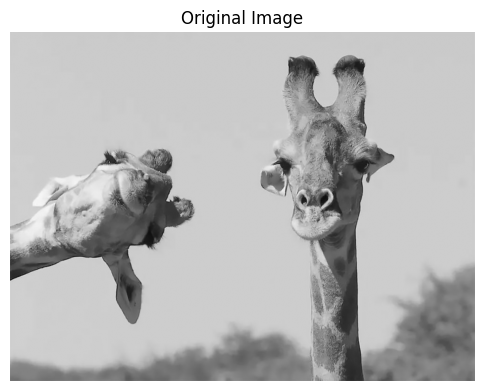

In [ ]:
# Download and load the image
url = "https://designyoutrust.com/wp-content/uploads/2020/09/0-31.jpg"
urllib.request.urlretrieve(url, "image.jpg")
img = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)  # Load as grayscale for simplicity

# Check if image is loaded properly
if img is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully.")
    display_image(img, "Original Image")

In [ ]:
def reduce_intensity_levels(image, levels):
    """
    Reduce the number of intensity levels in the image.
    levels: desired number of intensity levels (must be power of 2)
    """
    if not (levels > 0 and (levels & (levels - 1)) == 0):  # Check if power of 2
        print("Error: Number of levels must be a power of 2.")
        return None
    factor = 256 / levels
    reduced_img = (image // factor) * factor
    return reduced_img.astype(np.uint8)

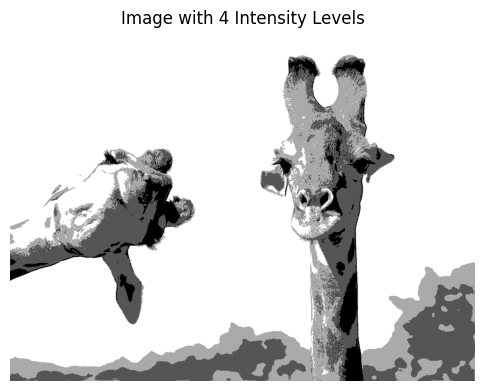

In [ ]:
# Test intensity reduction with variable input
desired_levels = 4
reduced_img = reduce_intensity_levels(img, desired_levels)
if reduced_img is not None:
    display_image(reduced_img, f"Image with {desired_levels} Intensity Levels")

In [ ]:
def spatial_average(image, kernel_size):
    """
    Apply spatial averaging using a square kernel of specified size.
    """
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    averaged_img = cv2.filter2D(image, -1, kernel)
    return averaged_img.astype(np.uint8)

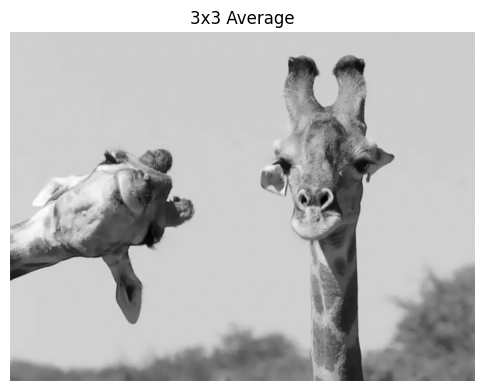

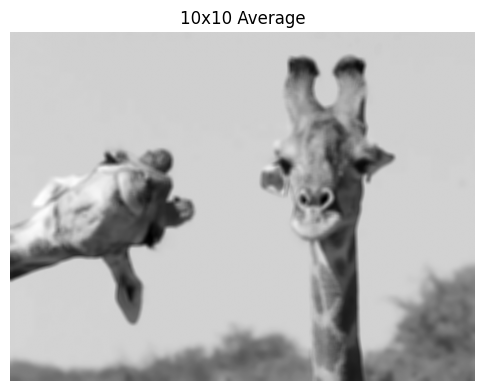

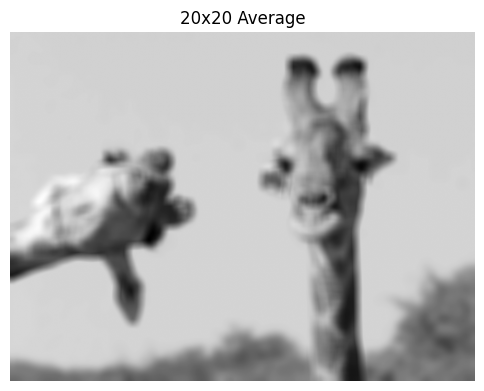

In [ ]:

# Apply averaging for different kernel sizes
avg_3x3 = spatial_average(img, 3)
avg_10x10 = spatial_average(img, 10)
avg_20x20 = spatial_average(img, 20)

display_image(avg_3x3, "3x3 Average")
display_image(avg_10x10, "10x10 Average")
display_image(avg_20x20, "20x20 Average")

In [ ]:
def rotate_image(image, angle):
    """
    Rotate the image by the specified angle (in degrees).
    """
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(image, M, (w, h))
    return rotated_img.astype(np.uint8)


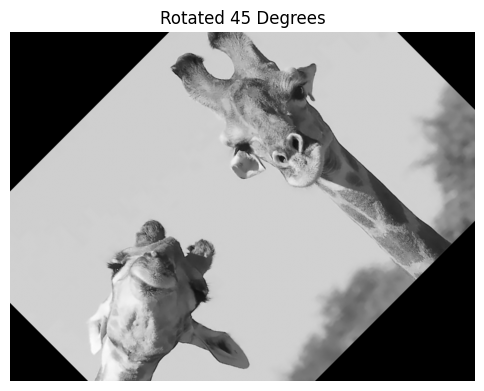

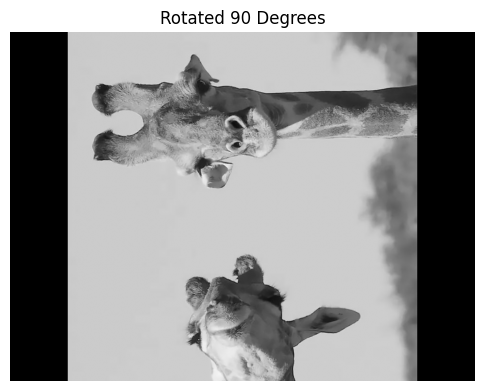

In [ ]:

# Rotate by 45 and 90 degrees
rotated_45 = rotate_image(img, 45)
rotated_90 = rotate_image(img, 90)

display_image(rotated_45, "Rotated 45 Degrees")
display_image(rotated_90, "Rotated 90 Degrees")

In [ ]:
def block_average(image, block_size):
    """
    Replace each non-overlapping block of size block_size x block_size with its average.
    """
    h, w = image.shape
    # Pad image to make it divisible by block_size
    pad_h = (block_size - h % block_size) % block_size
    pad_w = (block_size - w % block_size) % block_size
    padded_img = cv2.copyMakeBorder(image, 0, pad_h, 0, pad_w, cv2.BORDER_REPLICATE)

    # Initialize output image
    output = np.zeros_like(padded_img)

    # Process each block
    for i in range(0, padded_img.shape[0], block_size):
        for j in range(0, padded_img.shape[1], block_size):
            block = padded_img[i:i+block_size, j:j+block_size]
            block_mean = np.mean(block).astype(np.uint8)
            output[i:i+block_size, j:j+block_size] = block_mean

    # Crop back to original size
    output = output[:h, :w]
    return output.astype(np.uint8)


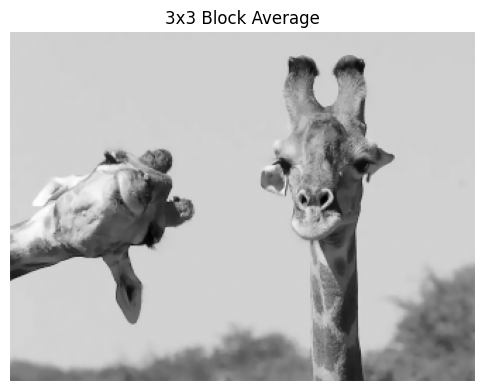

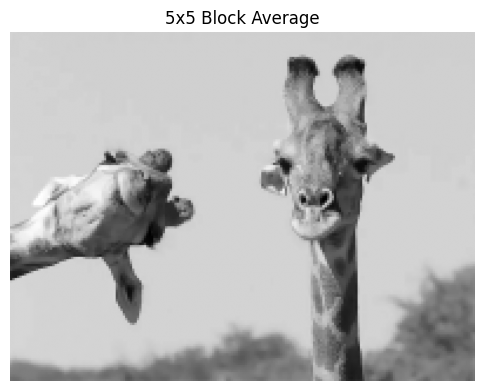

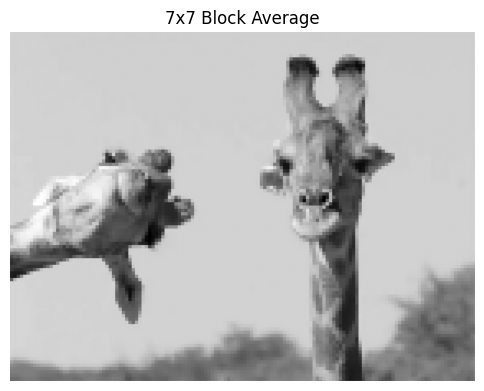

In [ ]:

# Apply block averaging for different block sizes
block_avg_3x3 = block_average(img, 3)
block_avg_5x5 = block_average(img, 5)
block_avg_7x7 = block_average(img, 7)

display_image(block_avg_3x3, "3x3 Block Average")
display_image(block_avg_5x5, "5x5 Block Average")
display_image(block_avg_7x7, "7x7 Block Average")